In [1]:
import numpy as np
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import os
import madx.particles_trajectory_generator as ptg
import importlib as il
import data.bunch_configuration as buc
import madx.madx_configuration as mc
import visualization.visualize as visualize
import madx.matrix_indexes as matrix_indexes_madx
il.reload(ptg)
sns.set(style="whitegrid")
sys.path.append("/home/rafalmucha/Pobrane/optic/optics_generator_python/src")
path_to_configuration = "/home/rafalmucha/Pobrane/optic/2017.1/"
path_to_xml_file = "/home/rafalmucha/Pobrane/optic/2017.1/configuration_reco_beam1.xml"
item_number = 0
madx_configuration = mc.MadxConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [2]:
# Parameters of bunch
x_mean = 0.0
sigma_x = 0
theta_x_mean = 0
sigma_theta_x = 0.00000
y_mean = 0
sigma_y = 0
theta_y_mean = 0.00
sigma_theta_y = 0.00000
pt_mean = -0.15
sigma_pt = 0.2

particles_number = 900

In [3]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, particles_number,
                                                        theta_x_mean, sigma_theta_x, 1,
                                                        y_mean, sigma_y, 1,
                                                        theta_y_mean, sigma_theta_y, 1,
                                                        pt_mean, sigma_pt, 1)

In [4]:
output = ptg.generate_random_particles(madx_configuration, bunch_configuration, particles_number)

/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks


In [5]:
output["end"]

array([[ 1.00000000e+00,  1.00000000e+00,  2.75103797e-02, ...,
        -2.03705412e-01,  1.84264000e+02,  6.50000000e+03],
       [ 2.00000000e+00,  1.00000000e+00,  1.93627339e-02, ...,
        -1.55940953e-01,  1.84264000e+02,  6.50000000e+03],
       [ 3.00000000e+00,  1.00000000e+00,  2.08495157e-02, ...,
        -1.65142985e-01,  1.84264000e+02,  6.50000000e+03],
       ...,
       [ 8.98000000e+02,  1.00000000e+00,  1.81685891e-02, ...,
        -1.48380316e-01,  1.84264000e+02,  6.50000000e+03],
       [ 8.99000000e+02,  1.00000000e+00,  2.23180654e-02, ...,
        -1.74009957e-01,  1.84264000e+02,  6.50000000e+03],
       [ 9.00000000e+02,  1.00000000e+00,  3.37323071e-02, ...,
        -2.36224245e-01,  1.84264000e+02,  6.50000000e+03]])

In [6]:
# Names of segments, like MQXA.3R5
start_segment_name = "start"
end_segment_name = "TCL.5R5.B1"

if start_segment_name != "start":
    output[start_segment_name].T[1] -= 1
    
non_filtered_input_matrix = output[start_segment_name]
output_matrix = output[end_segment_name]
indexes = output_matrix.T[0].astype(int) - 1
input_matrix = output[start_segment_name][indexes]

In [7]:
datasets = {
    "all input": (non_filtered_input_matrix, matrix_indexes_madx.ptc_track),
    "input which passed": (input_matrix, matrix_indexes_madx.ptc_track),
    "output": (output_matrix, matrix_indexes_madx.ptc_track)
}

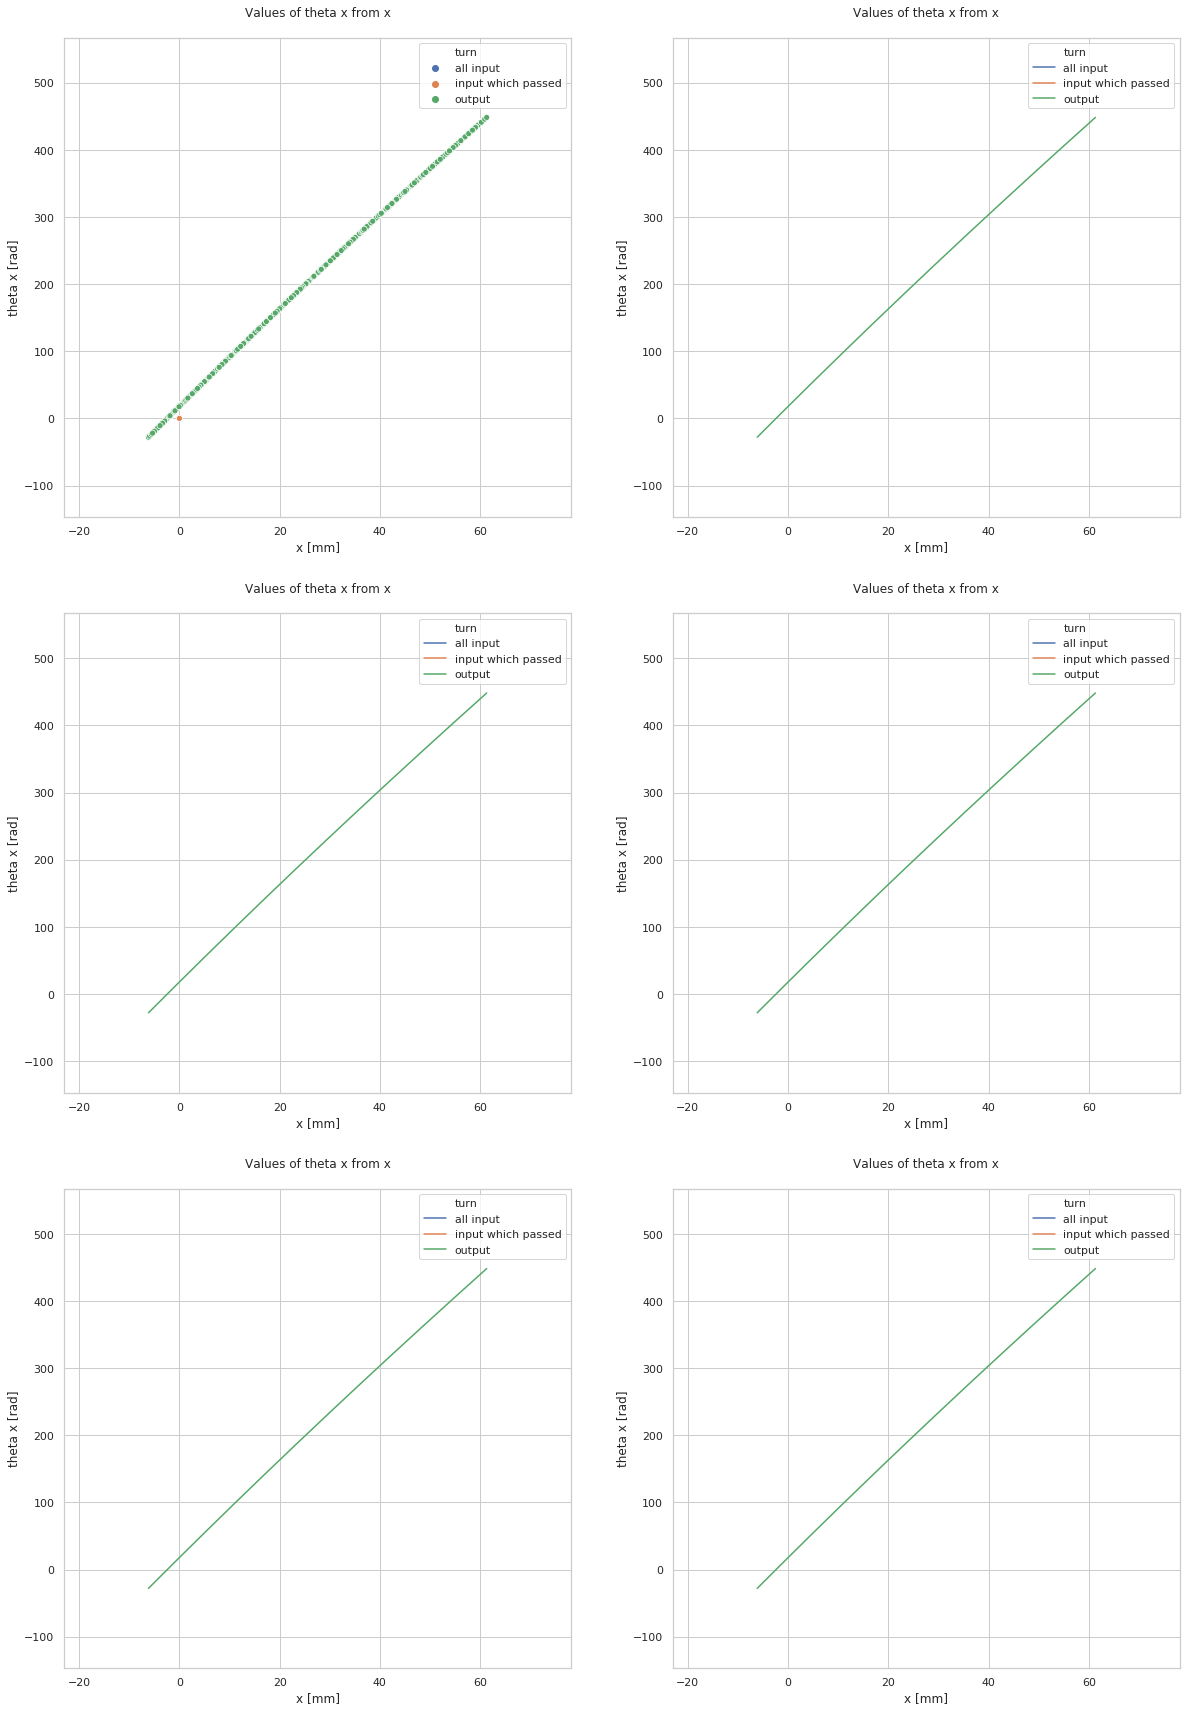

In [8]:
f, axes = plt.subplots(3, 2)

fig = plt.gcf()
fig.set_size_inches(20,30)

visualize.plot_with_turn("x", "theta x", "turn", datasets, plot_axes=axes, plot_x_pos=0, plot_y_pos=0, plot_function=sns.scatterplot)

visualize.plot_with_turn("x", "theta x", "turn", datasets, plot_axes=axes, plot_x_pos=0, plot_y_pos=1, plot_function=sns.scatterplot)

visualize.plot_with_turn("x", "theta x", "turn", datasets, plot_axes=axes, plot_x_pos=1, plot_y_pos=0, plot_function=sns.scatterplot)

visualize.plot_with_turn("x", "theta x", "turn", datasets, plot_axes=axes, plot_x_pos=1, plot_y_pos=1, plot_function=sns.scatterplot)

visualize.plot_with_turn("x", "theta x", "turn", datasets, plot_axes=axes, plot_x_pos=2, plot_y_pos=0, plot_function=sns.scatterplot)

visualize.plot_with_turn("x", "theta x", "turn", datasets, plot_axes=axes, plot_x_pos=2, plot_y_pos=1, plot_function=sns.scatterplot)


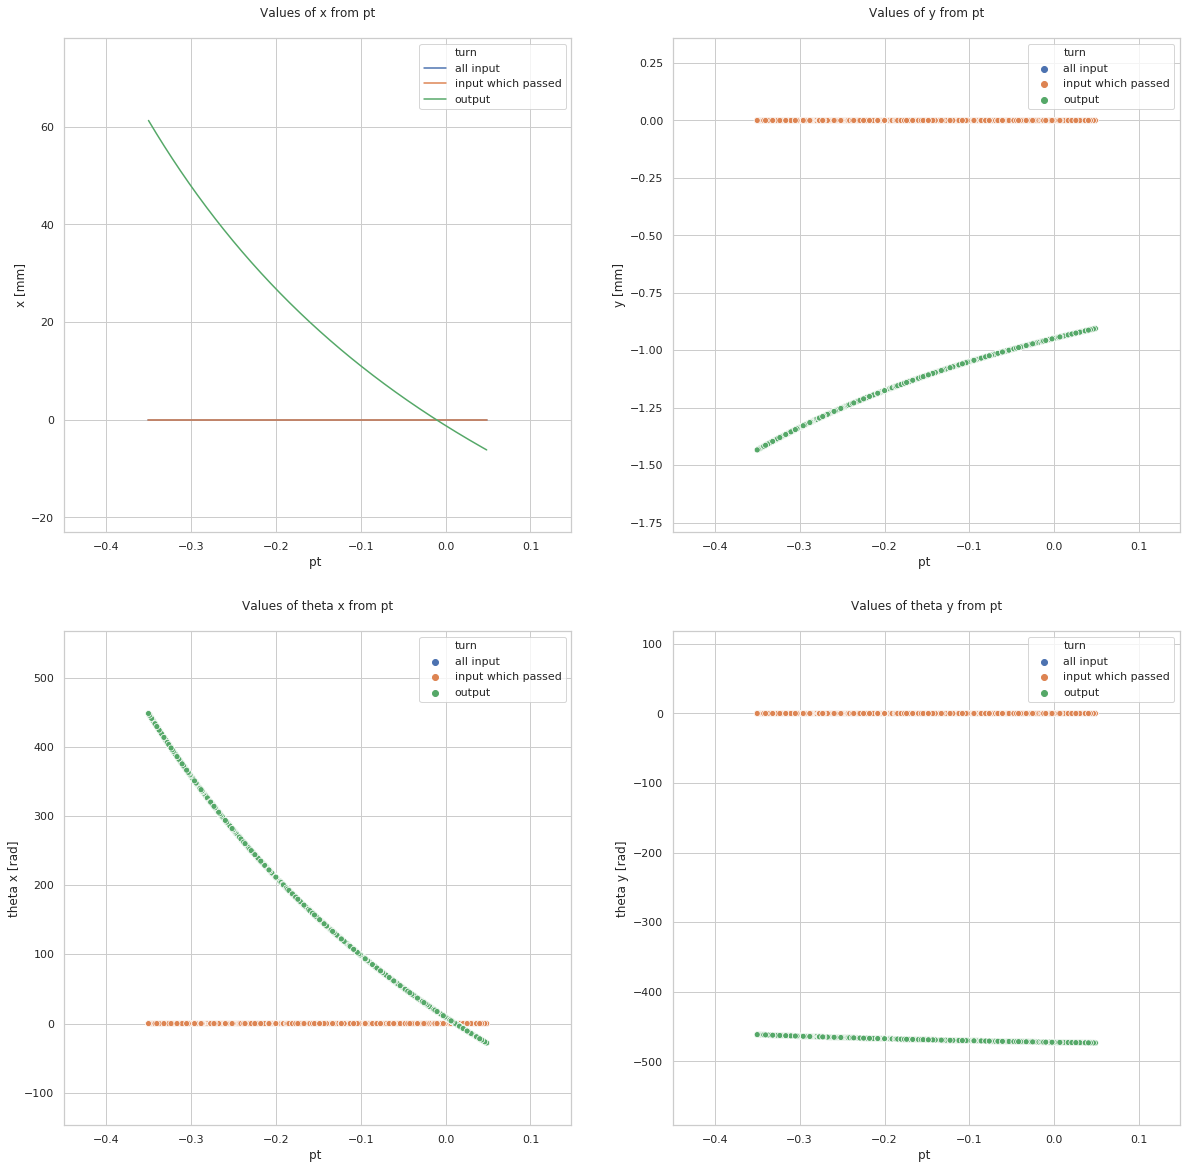

In [11]:
f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(20,20)

visualize.plot_with_turn("pt", "x", "turn", datasets, plot_axes=axes, plot_x_pos=0, plot_y_pos=0)

visualize.plot_with_turn("pt", "y", "turn", datasets, plot_axes=axes, plot_x_pos=0, plot_y_pos=1, plot_function=sns.scatterplot)

visualize.plot_with_turn("pt", "theta x", "turn", datasets, plot_axes=axes, plot_x_pos=1, plot_y_pos=0, plot_function=sns.scatterplot)

visualize.plot_with_turn("pt", "theta y", "turn", datasets, plot_axes=axes, plot_x_pos=1, plot_y_pos=1, plot_function=sns.scatterplot)

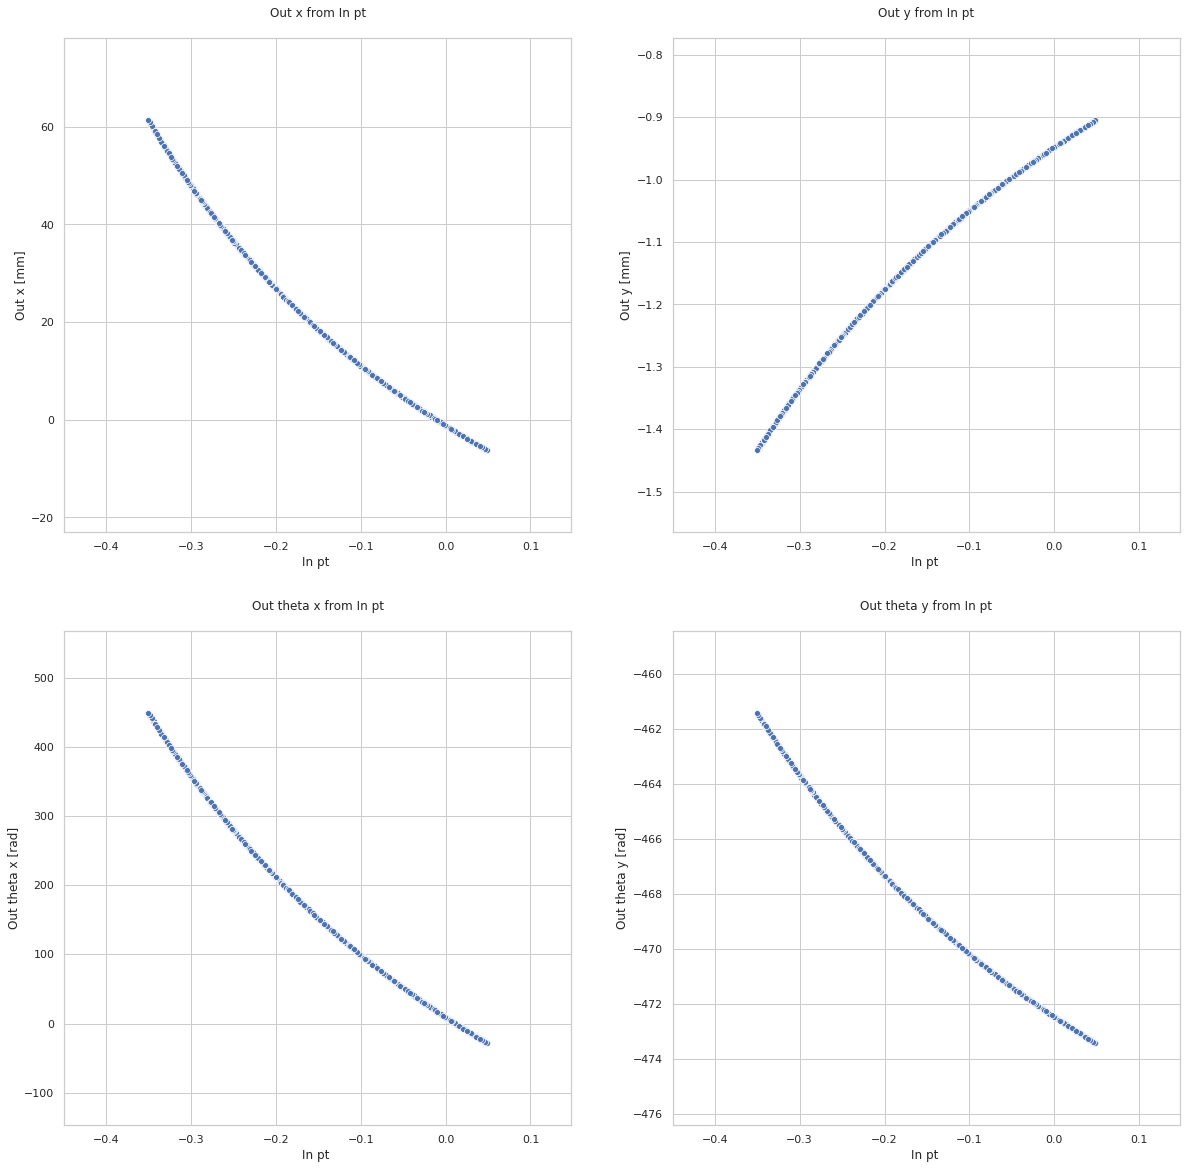

In [16]:
f, axes = plt.subplots(2, 2)

fig = plt.gcf()
fig.set_size_inches(20,20)

visualize.plot_from_two_matrices("pt", "x", input_matrix, output_matrix, matrix_indexes_madx.ptc_track, matrix_indexes_madx.ptc_track, axes, 0, 0, x_name_prefix="In ", y_name_prefix="Out ", plot_function=sns.scatterplot)

visualize.plot_from_two_matrices("pt", "y", input_matrix, output_matrix, matrix_indexes_madx.ptc_track, matrix_indexes_madx.ptc_track, axes, 0, 1, x_name_prefix="In ", y_name_prefix="Out ", plot_function=sns.scatterplot)

visualize.plot_from_two_matrices("pt", "theta x", input_matrix, output_matrix, matrix_indexes_madx.ptc_track, matrix_indexes_madx.ptc_track, axes, 1, 0, x_name_prefix="In ", y_name_prefix="Out ", plot_function=sns.scatterplot)

visualize.plot_from_two_matrices("pt", "theta y", input_matrix, output_matrix, matrix_indexes_madx.ptc_track, matrix_indexes_madx.ptc_track, axes, 1, 1, x_name_prefix="In ", y_name_prefix="Out ", plot_function=sns.scatterplot)